## Loading COCO Data

In [1]:
from pathlib import Path
import json

# load COCO metadata
filename = "data/captions_train2014.json"
with Path(filename).open() as f:
    coco_data = json.load(f)

In [2]:
len(coco_data["images"])

82783

In [3]:
coco_data["images"][0]

{'license': 5,
 'file_name': 'COCO_train2014_000000057870.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-14 16:28:13',
 'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
 'id': 57870}

In [4]:
coco_data["images"][0]['coco_url']

'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg'

In [5]:
import io

import requests
from PIL import Image


def download_image(img_url: str) -> Image:
    """Fetches an image from the web.

    Parameters
    ----------
    img_url : string
        The url of the image to fetch.

    Returns
    -------
    PIL.Image
        The image."""

    response = requests.get(img_url)
    return Image.open(io.BytesIO(response.content))

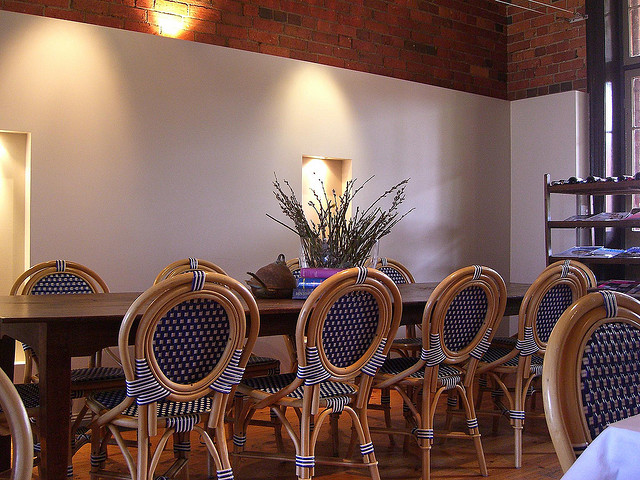

In [6]:
download_image('http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg')

In [7]:
for i in range(1000):
    print(i, coco_data["annotations"][i]["caption"])

0 A very clean and well decorated empty bathroom
1 A panoramic view of a kitchen and all of its appliances.
2 A blue and white bathroom with butterfly themed wall tiles.
3 A panoramic photo of a kitchen and dining room
4 A graffiti-ed stop sign across the street from a red car 
5 A vandalized stop sign and a red beetle on the road
6 A bathroom with a border of butterflies and blue paint on the walls above it.
7 An angled view of a beautifully decorated bathroom.
8 The two people are walking down the beach.
9 A sink and a toilet inside a small bathroom.
10 An empty kitchen with white and black appliances.
11 A white square kitchen with tile floor that needs repairs 
12 The vanity contains two sinks with a towel for each.
13 Several metal balls sit in the sand near a group of people.
14 Two people carrying surf boards on a beach.
15 A kitchen with brown cabinets, tile backsplash, and grey counters.
16 A surfer, a woman, and a child walk on the beach.
17 A few people sit on a dim transpor

In [8]:
len(coco_data["annotations"])

414113

In [9]:
coco_data["annotations"][0]

{'image_id': 318556,
 'id': 48,
 'caption': 'A very clean and well decorated empty bathroom'}

## Loading GloVe Embedding

In [10]:
from gensim.models import KeyedVectors
filename = "data/glove.6B.200d.txt.w2v"
glove = KeyedVectors.load_word2vec_format(filename, binary=False)

C:\Users\evelyn.zhu\anaconda3\envs\week3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [11]:
_ = glove["king"]

## Loading Image Descriptor Vectors

In [12]:
# load saved features
import pickle
with Path('data/resnet18_features.pkl').open('rb') as f:
    resnet18_features = pickle.load(f)

In [13]:
len(resnet18_features.keys())

82612

In [14]:
list(resnet18_features.keys())[0:10] # Grabbing the first 10 keys

[57870, 384029, 222016, 520950, 69675, 547471, 122688, 392136, 398494, 90570]

In [15]:
resnet18_features[318556].shape

(1, 512)

## Making Rudimentary Database Class

In [16]:
from collections import defaultdict

In [17]:
class Database:
    def __init__(self):
        self.ID_to_descriptor = resnet18_features
        self.ID_to_URL = dict()
        self.ID_to_captions = defaultdict(list) # key:value | ID --> list of captions corresonding to ID
        # NOTE: USE "glove" TO CONVERT WORD --> WORD EMBEDDING
        
        # Getting ID --> URL:
        for i in range(len(coco_data["images"])):
            ID = coco_data["images"][i]['id']
            URL = coco_data["images"][i]['coco_url']
            self.ID_to_URL[ID] = URL
        
        # Getting ID --> Captions
        for i in range(len(coco_data["annotations"])):
            ID = coco_data["annotations"][i]['image_id']
            caption = coco_data["annotations"][i]['caption']
            self.ID_to_captions[ID].append(caption)
            

In [18]:
db = Database()

In [19]:
list_of_IDs = list(db.ID_to_URL.keys())

for i in range(0, 100):
    print(i, db.ID_to_URL[list_of_IDs[i]])

print()
    
for i in range(0, 100):
    print(i, db.ID_to_captions[list_of_IDs[i]])

0 http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg
1 http://images.cocodataset.org/train2014/COCO_train2014_000000384029.jpg
2 http://images.cocodataset.org/train2014/COCO_train2014_000000222016.jpg
3 http://images.cocodataset.org/train2014/COCO_train2014_000000520950.jpg
4 http://images.cocodataset.org/train2014/COCO_train2014_000000069675.jpg
5 http://images.cocodataset.org/train2014/COCO_train2014_000000547471.jpg
6 http://images.cocodataset.org/train2014/COCO_train2014_000000122688.jpg
7 http://images.cocodataset.org/train2014/COCO_train2014_000000392136.jpg
8 http://images.cocodataset.org/train2014/COCO_train2014_000000398494.jpg
9 http://images.cocodataset.org/train2014/COCO_train2014_000000090570.jpg
10 http://images.cocodataset.org/train2014/COCO_train2014_000000504616.jpg
11 http://images.cocodataset.org/train2014/COCO_train2014_000000161919.jpg
12 http://images.cocodataset.org/train2014/COCO_train2014_000000457732.jpg
13 http://images.cocodataset.org/tr

In [20]:
len(db.ID_to_URL)

82783

In [21]:
len(db.ID_to_captions)

82783

# Debugging and Notes (don't run)

In [217]:
sample_text_1 = "Adjustable magnifying mirror attached to a bathroom wall"
sample_text_2 = "Several groups of people are standing outside of a building."

In [109]:
import re, string
import numpy as np
from collections import Counter

punc_regex = re.compile('[{}]'.format(re.escape(string.punctuation)))

def tokenize(text):
    return punc_regex.sub('', text).lower().split()

tokenized_sample_text = tokenize(sample_text_1)
counter_sample_text = Counter(tokenized_sample_text)
descriptor_sample_text = np.array([counter_sample_text[word] for word in sorted(counter_sample_text)], dtype=float)
print(sorted(counter_sample_text))
print(descriptor_sample_text)

['a', 'adjustable', 'attached', 'bathroom', 'magnifying', 'mirror', 'to', 'wall']
[1. 1. 1. 1. 1. 1. 1. 1.]


In [110]:
# vanilla_to_vocab function, does not have k and stopwords parameters
def vanilla_to_vocab(list_of_counters):
    vocab = set()
    for counter in list_of_counters:
        vocab.update(counter)
    return sorted(vocab)

In [269]:
def to_vocab(list_of_counters, k=None, stop_words=tuple()):
    """ 
    [word, word, ...] -> sorted list of top-k unique words
    Excludes words included in `stop_words`
    
    Parameters
    ----------
    list_of_counters : Iterable[Iterable[str]]
    
    k : Optional[int]
        If specified, only the top-k words are returned
    
    stop_words : Collection[str]
        A collection of words to be ignored when populating the vocabulary
    """
    # <COGINST>
    vocab = Counter()
    for counter in list_of_counters:
        vocab.update(counter)
        
    for word in set(stop_words):
        vocab.pop(word, None)  # if word not in bag, return None
    return sorted(i for i,j in vocab.most_common(k))
    # </COGINST>

In [127]:
count1 = Counter(tokenize(sample_text_1))
count2 = Counter(tokenize(sample_text_2))
to_vocab([count1, count2])
print()

In [69]:
# this produces the vocab list from all the captions, but we don't need it
all_caption_words = set()

for ID in db.ID_to_captions:
    for caption in db.ID_to_captions[ID]:
        tokenized_caption = tokenize(caption)
        for word in tokenized_caption:
            all_caption_words.add(word)

all_caption_words = sorted(all_caption_words)
print(len(all_caption_words))
print(all_caption_words)

24780
['007', '019', '030', '0605', '1', '10', '100', '101', '1019', '1020', '1022', '1028', '1033', '104', '1040s', '1055', '1080', '108th', '10cc', '10th', '11', '1102', '1105am', '1118', '1120', '1121', '1124', '1130', '114', '1198', '1198kilogram', '11am', '11th', '12', '120', '1200', '1201', '1208pm', '1213', '1215', '121mph', '1224', '1227', '123', '1230', '1235', '1240', '125', '1255', '1255pm', '126', '12r', '13', '130th', '13th', '14', '145', '14th', '15', '150', '153', '156', '15mph', '16', '164', '1650', '16th', '17', '175', '17th', '18', '1800s', '184', '1876', '1879', '1897', '18th', '18wheeler', '19', '1900s', '1908', '1909', '1910', '1911', '1915', '1920s', '1930s', '1932', '1933', '1934', '1939', '1940s', '1950', '1950s', '1953', '1956', '1960s', '1960sera', '1965', '1970', '1970s', '1971', '1974', '198', '1990s', '1994', '19th', '1st', '2', '20', '200', '2000s', '2003', '2007', '2009', '2010', '2011', '2012', '2013', '205', '2082', '209', '20s', '20th', '21st', '22', '

In [80]:
all_caption_words = []

for ID in db.ID_to_captions:
    for caption in db.ID_to_captions[ID]:
        tokenized_caption = set(tokenize(caption))
        for word in tokenized_caption:
            all_caption_words.append(word)

all_caption_words = sorted(all_caption_words)
print(len(all_caption_words))
#print(all_caption_words)

3902100


In [81]:
counter = Counter(all_caption_words)

In [79]:
print(counter)

Counter({'a': 684559, 'on': 150673, 'of': 142759, 'the': 137979, 'in': 128904, 'with': 107699, 'and': 98730, 'is': 68666, 'man': 51311, 'to': 47733, 'sitting': 36822, 'an': 34981, 'two': 34094, 'standing': 30059, 'at': 29843, 'people': 29652, 'are': 28811, 'next': 25915, 'white': 25378, 'woman': 24034, 'table': 21325, 'street': 21189, 'that': 19524, 'holding': 19435, 'person': 17195, 'large': 17179, 'some': 17100, 'it': 16915, 'down': 16464, 'top': 15481, 'group': 15244, 'field': 14660, 'up': 14575, 'small': 14125, 'near': 13715, 'tennis': 13652, 'his': 13607, 'front': 13527, 'black': 13393, 'plate': 12997, 'room': 12937, 'train': 12748, 'riding': 12672, 'dog': 12620, 'red': 12074, 'young': 11953, 'by': 11950, 'cat': 11695, 'water': 11495, 'baseball': 11399, 'has': 10522, 'while': 10433, 'walking': 10326, 'playing': 10257, 'bathroom': 10108, 'sign': 9711, 'blue': 9571, 'food': 9395, 'kitchen': 9362, 'grass': 9216, 'bus': 8989, 'there': 8862, 'parked': 8775, 'pizza': 8769, 'green': 8729

In [82]:
print(counter)

Counter({'a': 363840, 'on': 141343, 'of': 127911, 'in': 120826, 'the': 114107, 'with': 103364, 'and': 92020, 'is': 66425, 'man': 50583, 'to': 46710, 'sitting': 36706, 'an': 33655, 'two': 33324, 'standing': 29998, 'people': 29429, 'at': 29124, 'are': 28149, 'next': 25772, 'white': 24527, 'woman': 23817, 'table': 21107, 'street': 20348, 'that': 19332, 'holding': 19325, 'person': 17035, 'large': 16890, 'it': 16652, 'down': 16424, 'some': 16089, 'top': 15310, 'group': 15176, 'field': 14640, 'up': 14509, 'small': 13869, 'near': 13582, 'front': 13444, 'black': 13111, 'plate': 12824, 'room': 12734, 'his': 12697, 'riding': 12625, 'dog': 12372, 'by': 11868, 'red': 11864, 'young': 11855, 'cat': 11450, 'water': 11304, 'tennis': 11227, 'train': 10726, 'has': 10443, 'while': 10410, 'walking': 10298, 'playing': 10249, 'baseball': 10011, 'bathroom': 10007, 'blue': 9388, 'food': 9271, 'kitchen': 9231, 'grass': 9186, 'sign': 9075, 'there': 8825, 'parked': 8743, 'green': 8613, 'other': 8428, 'pizza': 84

In [70]:
list_of_caption_counters = []

for ID in db.ID_to_captions:
    captions = db.ID_to_captions[ID]
    for caption in captions:
        # caption is the sample text
        list_of_caption_counters.append(Counter(tokenize(caption)))

#caption_vocab = to_vocab(list_of_caption_counters)

In [129]:
print((caption_vocab)[3000])

bridges


In [130]:
print(len(caption_vocab))

24780


In [147]:
print(len(list_of_caption_counters))
print(list_of_caption_counters[0])

414113
Counter({'a': 1, 'very': 1, 'clean': 1, 'and': 1, 'well': 1, 'decorated': 1, 'empty': 1, 'bathroom': 1})


In [86]:
def calculate_all_idfs(counter):
    """ 
    Given the vocabulary, and the word-counts for each document, computes
    the inverse document frequency (IDF) for each term in the vocabulary.
    
    Parameters
    ----------
    vocab : Sequence[str]
        Ordered list of words that we care about.

    counters : Iterable[collections.Counter]
        The word -> count mapping for each document.
    
    Returns
    -------
    numpy.ndarray
        An array whose entries correspond to those in `vocab`, storing
        the IDF for each term `t`: 
                           log10(N / nt)
        Where `N` is the number of documents, and `nt` is the number of 
        documents in which the term `t` occurs.
    """
    # <COGINST>
    N = len(coco_data["annotations"])
    nt = list(counter.values())
    nt = np.array(nt, dtype=float)
    return np.log10(N / nt)
    # </COGINST>

In [88]:
all_idfs = calculate_all_idfs(counter)

In [89]:
print(len(all_idfs))

24780


In [153]:
input_text = "A horse on a beach"
input_text_counter = to_counter(tokenize(input_text))
print(input_text_counter)

Counter({'a': 2, 'horse': 1, 'on': 1, 'beach': 1})


In [161]:
test_idfs = []
N_caption = len(list_of_caption_counters)

for word in input_text_counter:
    total = 0
    for counter in list_of_caption_counters:
        if word in counter:
            total+=1
    print(total)
    test_idfs.append(np.log10(N_caption/total))
print(test_idfs)

363840
5656
141343
7834
[0.05620842125384329, 1.8646094634726411, 0.4668445593004767, 1.723135297049637]


In [ ]:
# def caption_idf(tokenized_caption, list_of_counters):
#     idf = []
#     N = len(list_of_counters)

#     for word in tokenized_caption:
#         total = 0
#         for counter in list_of_caption_counters:
#             if word in counter:
#                 total+=1
#         idf.append(np.log10(N_caption/total))
#     return idf

In [175]:
def caption_idf(caption_vocab, list_of_counters):
    N = len(list_of_counters)
    nt = [sum(1 if term in counter else 0 for counter in list_of_counters) for term in caption_vocab]
    nt = np.array(nt, dtype=float)
    return np.log10(N / nt)

In [220]:
input_text = "A horse on a beach."
input_text_counter = to_counter(tokenize(input_text))

idf = caption_idf(to_vocab([input_text_counter]), list_of_caption_counters)
idf

array([0.05620842, 1.7231353 , 1.86460946, 0.46684456])

In [228]:
import mygrad as mg

In [247]:
def calculate_caption_embedding(caption_vocab, list_of_counters):
    glove_embeddings = [glove[term] for term in caption_vocab] # word embeddings
    idf = caption_idf(caption_vocab, list_of_counters)
    w_caption = sum(np.array([glove_embeddings[i] * idf[i] for i in range(len(idf))]))
    return w_caption / mg.sqrt((w_caption ** 2).sum(keepdims=True))

In [248]:
test_1 = "A horse on a beach."
test_1_counter = to_counter(tokenize(test_1))
test_1_vocab = to_vocab([test_1_counter])

w_test_1 = calculate_caption_embedding(test_1_vocab, list_of_caption_counters)
print(w_test_1.shape)
print(w_test_1)

(200,)
Tensor([ 0.02172102, -0.00489686, -0.09408359, -0.12458941, -0.01024932,
        -0.05307079, -0.06299231, -0.0206073 ,  0.10604437, -0.10840561,
         0.01785353, -0.06559974,  0.0504417 ,  0.03399205,  0.06976786,
        -0.00798499, -0.06680685,  0.02785287,  0.03905855,  0.05788542,
         0.04892776,  0.32278606,  0.12505601,  0.05921734,  0.10925586,
        -0.02633936,  0.00877374, -0.00382797, -0.05514334, -0.07210769,
        -0.00920769,  0.05700012, -0.02906253, -0.04029917, -0.04422915,
         0.02724089, -0.08739398,  0.03698112,  0.05024428, -0.00428653,
         0.05558068,  0.01886266, -0.04011941,  0.04687426, -0.04812561,
         0.0869718 ,  0.09482136, -0.02379219, -0.00223327,  0.13145705,
        -0.05749877, -0.0333272 ,  0.06339198,  0.07612506,  0.0315076 ,
        -0.04916741, -0.06885079,  0.02725518,  0.01615123,  0.0082129 ,
         0.03023903, -0.0416427 , -0.10669306, -0.00284432, -0.03165784,
        -0.03325032, -0.07810558, -0.0140385

# Query Process

### Helper functions: tokenize, to_vocab, and phrase_idf

In [65]:
import re, string
import numpy as np
import mygrad as mg

from collections import Counter

punc_regex = re.compile('[{}]'.format(re.escape(string.punctuation)))

def tokenize(text):
    return punc_regex.sub('', text).lower().split()

def to_vocab(list_of_counters, k=None, stop_words=tuple()):
    """ 
    [word, word, ...] -> sorted list of top-k unique words
    Excludes words included in `stop_words`
    
    Parameters
    ----------
    list_of_counters : Iterable[Iterable[str]]
    
    k : Optional[int]
        If specified, only the top-k words are returned
    
    stop_words : Collection[str]
        A collection of words to be ignored when populating the vocabulary
    """
    # <COGINST>
    vocab = Counter()
    for counter in list_of_counters:
        vocab.update(counter)
        
    for word in set(stop_words):
        vocab.pop(word, None)  # if word not in bag, return None
    return sorted(i for i,j in vocab.most_common(k))
    # </COGINST>

def phrase_idf(phrase_vocab, list_of_counters):
    N = len(list_of_counters)
    print(N)
    print(phrase_vocab)
    
    # if term i is not in glove, we set nt[i] = N that way its corresponding idf value is 0
    nt = [sum(1 if term in counter else 0 for counter in list_of_counters) for term in phrase_vocab]
    nt = np.array(nt, dtype=float)
    
    nt[nt == 0] = N
    
    print(nt)
    return np.log10(N / nt)

### Create List of Caption Counters

In [49]:
# takes 2-3 seconds to finish
list_of_caption_counters = []

for ID in db.ID_to_captions:
    captions = db.ID_to_captions[ID]
    for caption in captions:
        list_of_caption_counters.append(Counter(tokenize(caption)))

In [50]:
print(len(list_of_caption_counters)) #414113 captions

414113


### Declare 'phrase'

In [64]:
phrase = "12390 house horse"

In [60]:
print("alakazam" in glove)

True


### Calculate IDF-Weighted Sum of GloVe Embedding

In [66]:
def calculate_phrase_embedding(phrase, list_of_counters):
    phrase_vocab = to_vocab([Counter(tokenize(phrase))])
    
    glove_embeddings = [(glove[term] if term in glove else np.zeros(200)) for term in phrase_vocab]
    idf = phrase_idf(phrase_vocab, list_of_counters)
    
    #print(glove_embeddings)
    print(idf)
    
    w_phrase = sum(np.array([glove_embeddings[i] * idf[i] for i in range(len(idf))]))
    
#     w_phrase = sum(np.array([(np.log10(idf[i]) * glove_embeddings[i] if phrase_vocab[i] in glove 
#                               else idf[i] * glove_embeddings[i]) for i in range(len(idf))]))
    
    return w_phrase / mg.sqrt((w_phrase ** 2).sum(keepdims=True)) # normalized

In [67]:
w_caption = calculate_phrase_embedding(phrase, list_of_caption_counters)

414113
['12390', 'horse', 'house']
[414113.   5656.   1719.]
[0.         1.86460946 2.38184299]


In [68]:
print(w_caption.shape)
print(w_caption)

(200,)
Tensor([ 0.0767331 , -0.02781354,  0.00552915, -0.10458341,  0.01064971,
        -0.0524612 , -0.06542183,  0.033155  ,  0.07097715,  0.00070111,
         0.05930094, -0.08392734,  0.08756035, -0.04957764,  0.02794213,
        -0.00141637, -0.06525133,  0.02646291, -0.01430357,  0.04023876,
         0.03249501,  0.36870275,  0.09641447, -0.01996201,  0.0792494 ,
        -0.08123603,  0.01297045, -0.02896976, -0.00646649, -0.00276916,
        -0.00816525, -0.04053316,  0.04822215, -0.02542555, -0.07085861,
         0.01767118, -0.0839166 , -0.03384091,  0.08319038,  0.02177498,
         0.03022952,  0.00429412, -0.0530664 ,  0.0741121 , -0.06641961,
         0.02996764,  0.08921178,  0.00729565, -0.01063072,  0.08954845,
        -0.01169392,  0.03981274,  0.11898422,  0.05409226,  0.00897661,
        -0.01615575, -0.04220611, -0.01481887, -0.01316068,  0.04448217,
         0.04555853, -0.01811453, -0.00998644, -0.07574435,  0.02947126,
        -0.07896627, -0.15722964, -0.0411231

In [8]:
print(parse_query("Hello World it is I."))

['hello', 'world', 'it', 'is', 'i']
None


In [53]:
# Dataset Structure:
# List of tuples as below:
(index_of_caption, image_ID, confuser_ID)

#Ex.
(4, 2374, 4820),
 # caption index, image-ID, confuser-ID

NameError: name 'index_of_caption' is not defined

In [ ]:
db.training_set # N = 65.6k
db.validation_set # N = 16k

db.parse_query("a man on the beach") --> # ONE word embedding that encapsulates the whole phrase